In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import sin,cos,tan,arcsin,arccos,arctan,arctan2,sqrt,pi
%matplotlib inline

def dh(a,alpha,d,theta):
    M = np.array([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

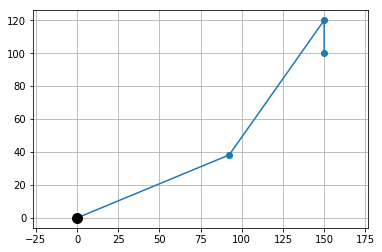

In [2]:
# IK
xq,yq = 150,100
phi = -pi/2
l1,l2,l3 = 100, 100, 20
rc = np.array([xq,yq]) - l3*np.array([cos(phi),sin(phi)])
x,y = rc[0],rc[1]
K = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
t2 = arctan2(sqrt(1-(K**2)), K)
t1 = arctan2(l2*y*cos(t2) + l1*y - l2*x*sin(t2), l2*x*cos(t2) + l1*x + l2*y*sin(t2))
#t1 = arctan2(y,x)
#d = sqrt(x**2 + y**2)

# FK
T1_0 = dh(l1,0,0,t1)
T2_1 = dh(l2,0,0,t2)
T3_0 = np.array([[cos(phi),-sin(phi),0,xq],
                 [sin(phi),cos(phi),0,yq],
                 [0,0,1,0],
                 [0,0,0,1]])
T2_0 = np.dot(T1_0,T2_1)
A = np.array([T1_0[0][3],T1_0[1][3]])
B = np.array([T2_0[0][3],T2_0[1][3]])
C = np.array([T3_0[0][3],T3_0[1][3]])
plt.plot([0,A[0],B[0],C[0]],[0,A[1],B[1],C[1]],"o-")
plt.plot([0],[0],'ko',markersize=10)
plt.grid('on')
plt.axis('equal');

In [7]:
from furlib import *

rrr = Manipulator((l1,0,0,t1),(l2,0,0,t2),(l3,0,0,t3))
J = rrr.J

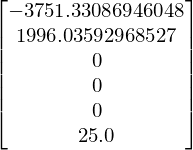

In [10]:
JN = J.subs({t1:pi/6, t2:pi/4, t3:-pi/6, l1:100, l2:100, l3:20})
(JN*Matrix([10,20,-5])).evalf()